# <center>Data Science Project: Election Preference by County</center>

## **1. Introduction**
---

### Participants:  Jialin Li(Cullen), Alexa Huang
---

### Data Science Project Steps:
1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3.Prepare data by using relevant preprocessing transformations, data cleaning,data standardization,deaing with null and outlier values, feature engineering,feature importance and imbalanced data.
4. Divide data into test an training set.Evaluate variety of algorithms by creating test harness for diverse algorithms in conjuction with resampling techniques like cross validation bootstrapping.
5. Improve Result by playing with hyperparameters and innovative methods like ensembles.
6. Choose the best model and present the results.

### **1.1 Define the Research problem and questions**


#### Research Hypothesis:
* * The project studies the grayscale images that could recognize the physical item label, using the frequency of the pixel scalar in an image to classify out the physical item label.

#### Research Questions:
1. Does the convert image pixels affect the label chosen?
2. Is there any correlation between the frequncy of grayscale pixels in a image and labels?
3. Is there any correlation between each image pixels?
4. Is better to use 

## **2. Analyze data by descriptive statistics and graphical visualization**
---

### 2.1 Download Data

In [ ]:
!ulimit -n 50000

In [ ]:
!wget -O images.zip https://cs.stanford.edu/people/rak248/VG_100K_2/images.zip

In [ ]:
!wget -O images2.zip https://cs.stanford.edu/people/rak248/VG_100K_2/images2.zip

In [ ]:
!unzip images.zip
!unzip images2.zip

In [5]:
!pip install fsspec
!wget -O objects.json.zip http://visualgenome.org/static/data/dataset/objects.json.zip
!unzip objects.json.zip

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


### 2.2 Preparing Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlopen
import json
from random import randrange
import seaborn as sns

In [2]:
objects_json=pd.read_json('objects.json')

In [3]:
flat_list = []
for inx,sublist in objects_json[['image_id','objects']].values:
    for item in sublist:
        item.update({'image_id':inx})
        flat_list.append(item)
image_labels = pd.DataFrame(flat_list)
image_samples = image_labels.sample(10000)

In [4]:
import os.path
from os import path
import threading
image_labels=image_labels[['image_id','object_id','merged_object_ids','names','synsets','w','h','x','y']]
image_samples_with_piexels = image_samples.copy()
image_samples_with_piexels['image_pixels'] = image_samples_with_piexels['synsets'].apply(lambda x:[])
undownload_images=[]
loaded_images=[]

def thread_function(index, row):
  try:
    im = None
    if path.exists('VG_100K/%s.jpg'% row['image_id']):
      im = Image.open('VG_100K/%s.jpg'% row['image_id']).convert("L")
      image_samples_with_piexels.at[index,'image_pixels']= pd.DataFrame(np.asarray(im)).iloc[row.y:row.y+row.h,row.x:row.x+row.w]
      loaded_images.append(index)
    elif path.exists('VG_100K_2/%s.jpg'% row['image_id']):
      im = Image.open('VG_100K_2/%s.jpg'% row['image_id']).convert("L")
      image_samples_with_piexels.at[index,'image_pixels']= pd.DataFrame(np.asarray(im)).iloc[row.y:row.y+row.h,row.x:row.x+row.w]
      loaded_images.append(index)
    else:
      undownload_images.append(index)
    im.close()
  except:
    undownload_images.append(index)
  # else:
  #   image_info = json.loads(urlopen("http://visualgenome.org/api/v0/images/%s?format=json"% row['image_id']).read().decode())
  #   im = Image.open(urlopen(image_info['url'])).convert("L")
  #   if not path.isdir('images'):
  #     os.mkdir('images')
  #   im.save('images/%s.jpg'% row['image_id'])
  # print('%s '%index,end='')

for index, row in image_samples.iterrows():
  threading.Thread(target=thread_function,args=(index,row)).start()

In [5]:
import time
for i in reversed(image_samples.index):
  while i not in loaded_images + undownload_images:
    time.sleep(5)
print()
print('Undownload Images %s %s'% (len(undownload_images),undownload_images))
print('finish download')


Undownload Images 0 []
finish download


In [6]:
print(len(loaded_images))
image_samples_with_piexels_fixed = image_samples_with_piexels.drop(index=undownload_images)
image_samples_with_piexels_fixed

10000


,synsets,h,object_id,merged_object_ids,names,w,y,x,image_id,image_pixels
1665317,[pigeon.n.01],50,2275964,[],[pigeon],82,147,22,2348537,22 23 24 25 26 27 28 29 3...
2340493,[],31,3951772,[],[sign],26,55,190,2317328,190 191 192 193 194 195 196 197 19...
391533,[eye.n.01],11,375319,[],[eyes],19,120,178,2404923,178 179 180 181 182 183 184 185 1...
1466439,[head.n.01],66,818826,[],[head],51,260,28,2356624,28 29 30 31 32 33 34 35 ...
818550,[sand.n.01],33,694288,[],[sand],72,287,0,2383425,0 1 2 3 4 5 6 7 ...
...,...,...,...,...,...,...,...,...,...,...
164160,[],38,4068755,[],[small],30,682,994,1159312,994 995 996 997 998 999 1000 ...
270917,[hand.n.01],30,230005,[],[hand],27,157,253,2409935,253 254 255 256 257 258 259 260 2...
498511,[boat.n.01],230,1163452,[],[boat],161,263,338,2400066,338 339 340 341 342 343 344 345 3...
1030371,[],66,1755153,[],[celery],135,64,103,2373925,103 104 105 106 107 108 109 110 1...


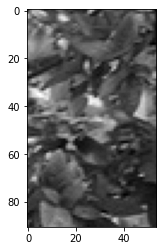

In [7]:
plt.imshow(image_samples_with_piexels_fixed.sample(1)['image_pixels'].values[0],cmap='gray')
plt.show()

### 2.3 Descriptive Statistics and Graphical Visualization
---

##### (2.3.1.1) Initialing Analysis Data

In [8]:
def histframe(x):
    hist,bins = np.histogram(x, range(0,256))
    return pd.DataFrame(data=[hist],columns=bins[:-1])

In [9]:
image_samples_with_pixels_analysis = image_samples_with_piexels_fixed.copy()
image_samples_with_pixels_analysis['names']= image_samples_with_pixels_analysis['names'].apply(lambda x:x[0])
image_samples_with_pixels_analysis['synsets']= image_samples_with_pixels_analysis['synsets'].apply(lambda x:str(x))
image_samples_with_pixels_analysis['total_pixels']= image_samples_with_pixels_analysis['image_pixels'].apply(lambda x: x.values.sum())
image_samples_with_pixels_analysis['average_grayscale'] = pd.DataFrame(image_samples_with_pixels_analysis.apply(lambda x: x['total_pixels'] /(x['w'] * x['h']) if (x['w'] * x['h']) !=0 else np.nan ,axis=1))
image_samples_with_pixels_analysis

,synsets,h,object_id,merged_object_ids,names,w,y,x,image_id,image_pixels,total_pixels,average_grayscale
1665317,['pigeon.n.01'],50,2275964,[],pigeon,82,147,22,2348537,22 23 24 25 26 27 28 29 3...,519705,126.757317
2340493,[],31,3951772,[],sign,26,55,190,2317328,190 191 192 193 194 195 196 197 19...,59596,73.940447
391533,['eye.n.01'],11,375319,[],eyes,19,120,178,2404923,178 179 180 181 182 183 184 185 1...,16537,79.124402
1466439,['head.n.01'],66,818826,[],head,51,260,28,2356624,28 29 30 31 32 33 34 35 ...,187977,55.845811
818550,['sand.n.01'],33,694288,[],sand,72,287,0,2383425,0 1 2 3 4 5 6 7 ...,375214,157.918350
...,...,...,...,...,...,...,...,...,...,...,...,...
164160,[],38,4068755,[],small,30,682,994,1159312,994 995 996 997 998 999 1000 ...,187639,164.595614
270917,['hand.n.01'],30,230005,[],hand,27,157,253,2409935,253 254 255 256 257 258 259 260 2...,97050,119.814815
498511,['boat.n.01'],230,1163452,[],boat,161,263,338,2400066,338 339 340 341 342 343 344 345 3...,4909287,132.575938
1030371,[],66,1755153,[],celery,135,64,103,2373925,103 104 105 106 107 108 109 110 1...,1077272,120.905948


In [10]:
image_samples_with_pixels_analysis['histogram'] = image_samples_with_pixels_analysis['image_pixels'].apply(histframe)
image_hist =  image_samples_with_pixels_analysis['histogram'].apply(lambda x: x.loc[0])

#### 2.3.1 Table Information:

In [11]:
print("Dataset Analysis:")
print(image_samples_with_pixels_analysis.shape)
print(image_samples_with_pixels_analysis.info())
print(image_samples_with_pixels_analysis.iloc[:,2:].describe())
print(image_samples_with_pixels_analysis.dtypes)

Dataset Analysis:
(10000, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1665317 to 1800127
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   synsets            10000 non-null  object 
 1   h                  10000 non-null  int64  
 2   object_id          10000 non-null  int64  
 3   merged_object_ids  10000 non-null  object 
 4   names              10000 non-null  object 
 5   w                  10000 non-null  int64  
 6   y                  10000 non-null  int64  
 7   x                  10000 non-null  int64  
 8   image_id           10000 non-null  int64  
 9   image_pixels       10000 non-null  object 
 10  total_pixels       10000 non-null  int64  
 11  average_grayscale  9999 non-null   float64
 12  histogram          10000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.4+ MB
None
          object_id             w             y            x      

image information:
Label of the image:['paper towels']
Shape of the image : (1, 13)
Image Hight: [39]
Image Width: [81]


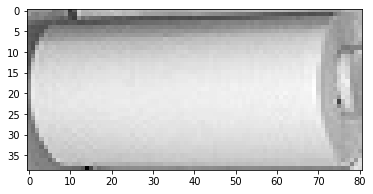

In [12]:
sample_image =image_samples_with_pixels_analysis.sample(1).head(1)
print("image information:")
print('Label of the image:{}'.format(sample_image.names.values))
print('Shape of the image : {}'.format(sample_image.shape))
print('Image Hight: {}'.format(sample_image.h.values))
print('Image Width: {}'.format(sample_image.w.values))
sample_pixels = pd.DataFrame(sample_image['image_pixels'].values[0])
plt.imshow(sample_pixels,cmap='gray')
plt.show()

#### 2.3.2 Evaluating Data

##### 2.3.2.1 Frequency Ditriution
--- 

Label Frequency:
           names  counts
0         window     210
1            man     174
2           tree     138
3          shirt     130
4         person     128
...          ...     ...
2519   motorcade       1
2520   price tag       1
2521     chariot       1
2522  orange bag       1
2523        dock       1

[2524 rows x 2 columns]


<AxesSubplot:xlabel='average_grayscale', ylabel='names'>

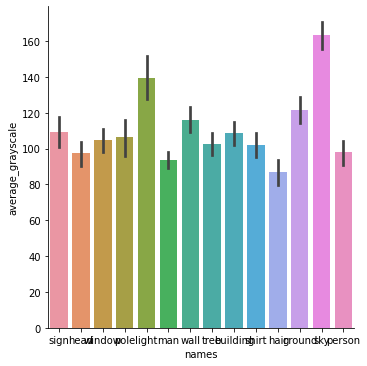

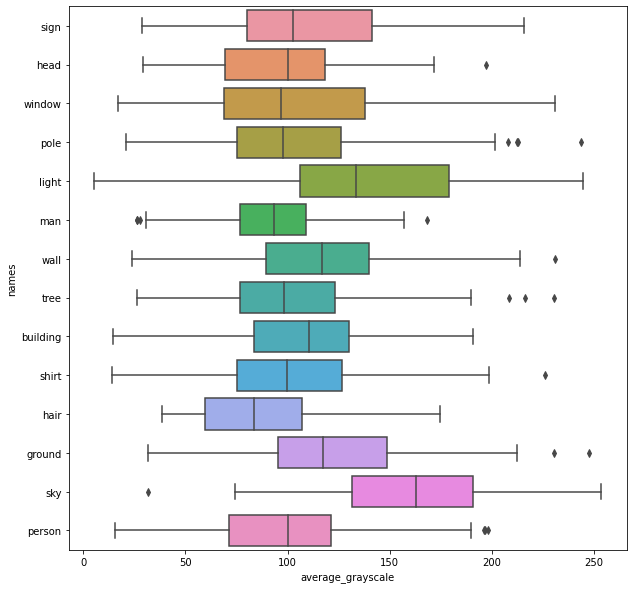

In [13]:
# a) For the categorical variable create a frequency distribution.
# b) For the categorical variable create a bar diagram.
print('Label Frequency:')
frequency = pd.DataFrame(image_samples_with_pixels_analysis['names'].value_counts()).reset_index()
frequency = frequency.rename(columns={'names':'counts','index':'names'})
cutted_data = image_samples_with_pixels_analysis[image_samples_with_pixels_analysis['names'].isin(frequency[frequency['counts']>75]['names'])]
print(frequency)
sns.catplot(x='names',y='average_grayscale',kind="bar", data=cutted_data, height=5)
plt.figure(figsize=(10,10))
sns.boxplot(x='average_grayscale',y='names',data=cutted_data)

<AxesSubplot:ylabel='Count'>

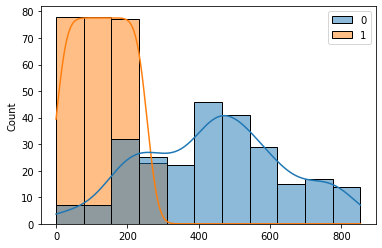

In [14]:
# A Sample image's pixel distribution
sns.histplot(np.histogram(image_samples_with_pixels_analysis['image_pixels'].sample(1).values[0],range(0,256)),kde=True)

##### 2.3.2.2 Distribution plot
---

The Numerical summaries grouped by names:
                 w           h  total_pixels  average_grayscale
names                                                          
22            36.0   30.000000       88411.0          81.862037
225           29.0   13.000000       37249.0          98.803714
3             13.0   21.333333       42030.0         157.610908
32            30.0   23.000000       94930.0         137.579710
4              5.0    7.000000        5539.0         158.257143
...            ...         ...           ...                ...
zipper        43.2   36.000000      135168.0          99.863524
zipper pull    9.0   12.000000       20689.0         191.564815
zippers      122.0  114.000000      894473.0          64.313561
zoo          499.5  183.000000     4943397.5          53.125195
zucchini     102.5   45.500000      491256.5         105.103015

[2524 rows x 4 columns]
Sample pixels distribution barplot with high ferquncy items:


c:\python38\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


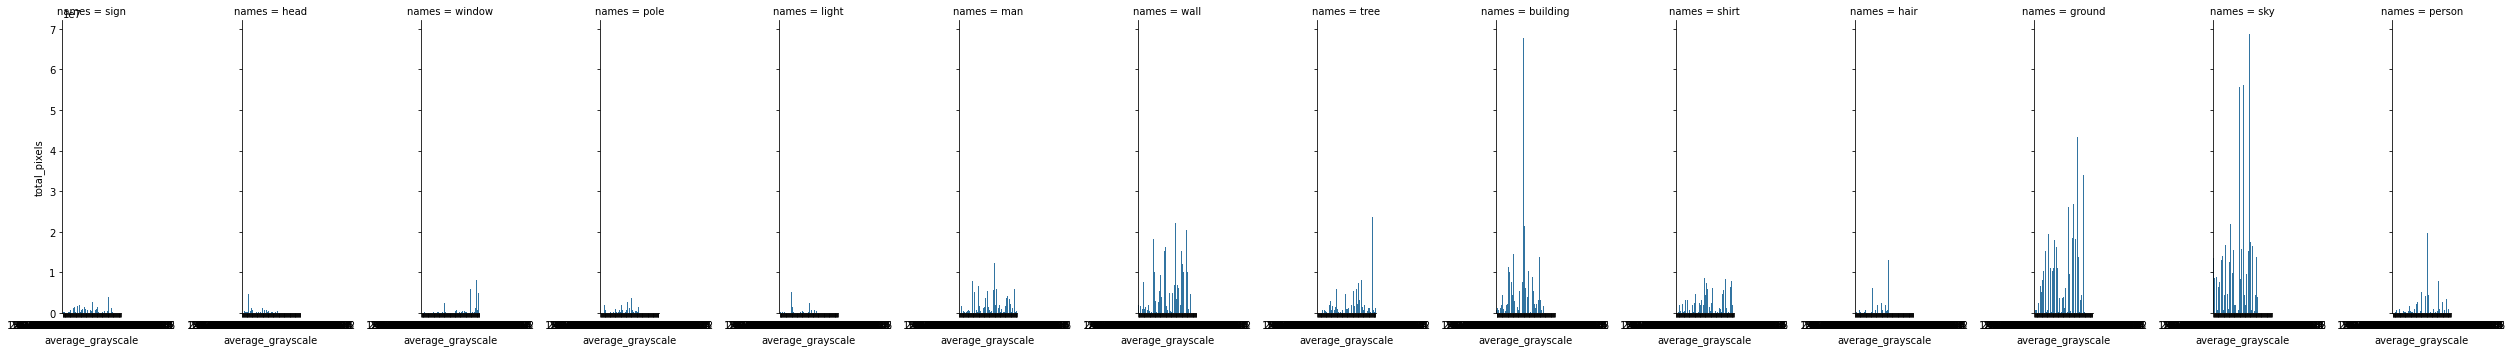

In [15]:
# c) For the quantitative variable create numerical summaries grouped by a categorical variable.
# d) For quantitative variable create a histogram and a boxplot grouped by categorical,
print('The Numerical summaries grouped by names:')
print(image_samples_with_pixels_analysis[['names','w','h','total_pixels','average_grayscale']].groupby(['names']).mean())
print('Sample pixels distribution barplot with high ferquncy items:')
g = sns.FacetGrid(cutted_data, col="names", height=5, aspect=.5)
g.map(sns.barplot, "average_grayscale", "total_pixels")

piexls distribution plot:


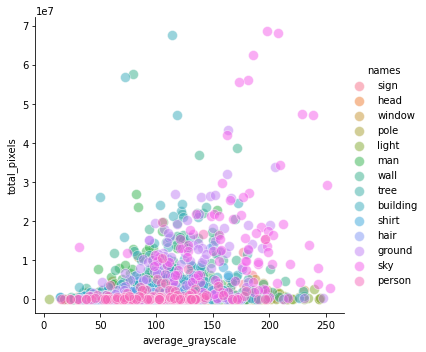

In [16]:
# scatter plot
print('piexls distribution plot:')
g = sns.FacetGrid(cutted_data, hue="names", height=5)
g.map(sns.scatterplot, "average_grayscale", "total_pixels", s=100, alpha=.5)
g.add_legend()

## **3. Prepare data by using relevant preprocessing transformations, data cleaning,data standardization,deaing with null and outlier values, feature engineering,feature importance and imbalanced data.**
---

### 3.1 Standardize Data

In [17]:
#stratified sampling
prepared_data = image_samples_with_piexels_fixed.copy()
del prepared_data['merged_object_ids']
del prepared_data['synsets']
del prepared_data['object_id']
prepared_data['names'] = prepared_data['names'].apply(lambda x:x[0])
prepared_data['total_pixels']= image_samples_with_pixels_analysis['total_pixels']
prepared_data['average_grayscale'] = image_samples_with_pixels_analysis['average_grayscale']
prepared_data = prepared_data.join(image_hist)
prepared_data

,h,names,w,y,x,image_id,image_pixels,total_pixels,average_grayscale,0,...,245,246,247,248,249,250,251,252,253,254
1665317,50,pigeon,82,147,22,2348537,22 23 24 25 26 27 28 29 3...,519705,126.757317,0,...,0,0,0,0,0,0,0,0,0,0
2340493,31,sign,26,55,190,2317328,190 191 192 193 194 195 196 197 19...,59596,73.940447,0,...,0,0,0,0,0,0,0,0,0,0
391533,11,eyes,19,120,178,2404923,178 179 180 181 182 183 184 185 1...,16537,79.124402,0,...,0,0,0,0,0,0,0,0,0,0
1466439,66,head,51,260,28,2356624,28 29 30 31 32 33 34 35 ...,187977,55.845811,30,...,1,1,0,0,1,0,0,0,2,12
818550,33,sand,72,287,0,2383425,0 1 2 3 4 5 6 7 ...,375214,157.918350,3,...,1,1,6,3,3,2,2,3,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164160,38,small,30,682,994,1159312,994 995 996 997 998 999 1000 ...,187639,164.595614,0,...,11,13,10,15,15,18,21,34,20,46
270917,30,hand,27,157,253,2409935,253 254 255 256 257 258 259 260 2...,97050,119.814815,0,...,0,1,2,1,0,2,1,0,1,8
498511,230,boat,161,263,338,2400066,338 339 340 341 342 343 344 345 3...,4909287,132.575938,0,...,15,12,13,22,35,37,108,180,342,2060
1030371,66,celery,135,64,103,2373925,103 104 105 106 107 108 109 110 1...,1077272,120.905948,0,...,3,0,3,1,3,0,2,3,1,2


In [18]:
# image_pixels_data = image_samples_with_piexels_fixed['image_pixels']
# image_pixels_data_flattened =image_pixels_data.apply(lambda x: x.values.flatten())
# image_pixels_data_flattened = pd.DataFrame(image_pixels_data_flattened.to_list(),index = image_pixels_data_flattened.index)
# image_pixels_data_flattened
# pixels_columns = image_pixels_data_flattened.copy()
# pixels_columns = pixels_columns.replace(np.nan,0)

### 3.2 Null Values Checking
---

In [19]:
empty_data = prepared_data[prepared_data.isna().any(axis=1)]
print(empty_data)
prepared_data = prepared_data.drop(empty_data.index)
prepared_data

        h names  w    y    x  image_id  \
463324  0  part  4  240  312   2401714   

                                             image_pixels  total_pixels  \
463324  Empty DataFrame
Columns: [312, 313, 314, 315]
...             0   

        average_grayscale  0  ...  245  246  247  248  249  250  251  252  \
463324                NaN  0  ...    0    0    0    0    0    0    0    0   

        253  254  
463324    0    0  

[1 rows x 264 columns]


,h,names,w,y,x,image_id,image_pixels,total_pixels,average_grayscale,0,...,245,246,247,248,249,250,251,252,253,254
1665317,50,pigeon,82,147,22,2348537,22 23 24 25 26 27 28 29 3...,519705,126.757317,0,...,0,0,0,0,0,0,0,0,0,0
2340493,31,sign,26,55,190,2317328,190 191 192 193 194 195 196 197 19...,59596,73.940447,0,...,0,0,0,0,0,0,0,0,0,0
391533,11,eyes,19,120,178,2404923,178 179 180 181 182 183 184 185 1...,16537,79.124402,0,...,0,0,0,0,0,0,0,0,0,0
1466439,66,head,51,260,28,2356624,28 29 30 31 32 33 34 35 ...,187977,55.845811,30,...,1,1,0,0,1,0,0,0,2,12
818550,33,sand,72,287,0,2383425,0 1 2 3 4 5 6 7 ...,375214,157.918350,3,...,1,1,6,3,3,2,2,3,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164160,38,small,30,682,994,1159312,994 995 996 997 998 999 1000 ...,187639,164.595614,0,...,11,13,10,15,15,18,21,34,20,46
270917,30,hand,27,157,253,2409935,253 254 255 256 257 258 259 260 2...,97050,119.814815,0,...,0,1,2,1,0,2,1,0,1,8
498511,230,boat,161,263,338,2400066,338 339 340 341 342 343 344 345 3...,4909287,132.575938,0,...,15,12,13,22,35,37,108,180,342,2060
1030371,66,celery,135,64,103,2373925,103 104 105 106 107 108 109 110 1...,1077272,120.905948,0,...,3,0,3,1,3,0,2,3,1,2


### 3.3 Outliers Checking

<AxesSubplot:xlabel='average_grayscale', ylabel='names'>

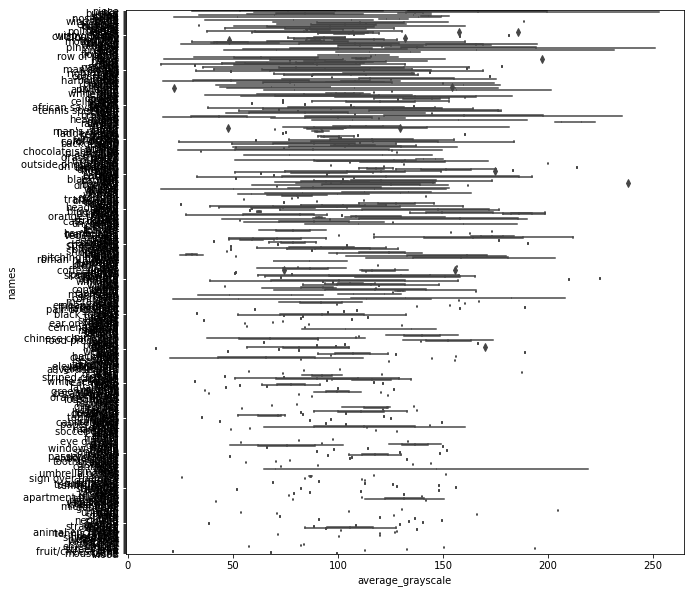

In [27]:
plt.figure(figsize=(10,10))
sns.boxplot(x='average_grayscale',y='names',data=prepared_data)

### 3.4 Correlation and Regression Analysis

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
area_total_pixels = pd.DataFrame(data={'area':image_samples_with_pixels_analysis[['w','h']].apply(lambda x:x.w*x.h,axis=1),'total_pixels':image_samples_with_pixels_analysis['total_pixels']}).reset_index()
del area_total_pixels['index']
regr = linear_model.LinearRegression()

Coefficients: 
 [[110.78755205]]
Mean squared error: 2833387621462.73
Coefficient of determination: 0.91


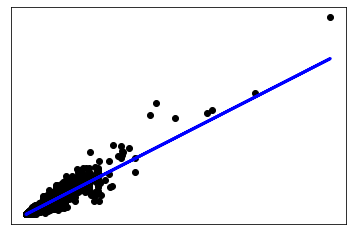

In [105]:

# Dividing data into two subsets training and test set.Training set trains the model
X_train, X_test, y_train, y_test = train_test_split(area_total_pixels['area'].values.reshape(-1,1), area_total_pixels['total_pixels'].values.reshape(-1,1), test_size=0.30)

regr.fit(X_train,y_train)
Y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

##### Correlation Matrix

<AxesSubplot:>

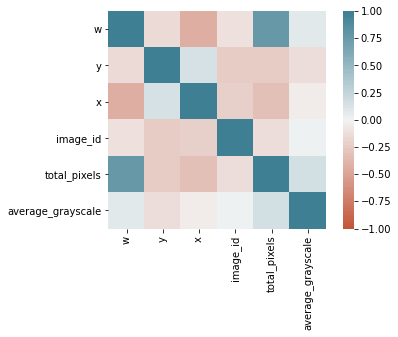

In [104]:
sns.heatmap(
    image_samples_with_pixels_analysis.iloc[:,3:].corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

Correlation of graysacle pixels


<AxesSubplot:>

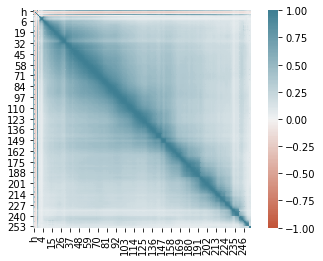

In [100]:
print('Correlation of graysacle pixels')
sns.heatmap(
    image_hist.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
# a) Objective and rationale of using the specific algorithm to achieve the objective.
# a) Steps of implementing the algorithm with regards to the context. Create relevant graphs.
# b) Interpretation of the results and prediction accuracy achieved
# c) Performance improvement techniques and improved accuracy achieved. Use feature selection, variable importance, compare RMSE(Regression) across models and Information gain (Decision Trees). K-fold cross validation , grid search etc.

## **4. Divide data into test an training set.Evaluate variety of algorithms by creating test harness for diverse algorithms in conjuction with resampling techniques like cross validation bootstrapping.**
---

### 4.1 Preparing Data

In [75]:
# Dividing data into two subsets training and test set.Training set trains the model
from sklearn.model_selection import train_test_split


#generate trainning set and testing set
# X = prepared_data.drop(columns=['names','image_id','image_pixels'])
y = prepared_data['names']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# Data normalization  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



### 4.2 Clustering tendency

In [74]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# hopkins implementation
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    return H

print('Clustering tendency(hopkins score): %s'% hopkins(X))


Clustering tendency(hopkins score): 0.9913926970947892


### 4.3 KNN Implementation

#### 4.3.1 Training

In [76]:

from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train,y_train)
y_pred = KNNmodel.predict(X_test)


#### 4.3.2 Evaluating

accuracy score 1.1333333333333333%
                          precision    recall  f1-score   support

                       3       0.00      0.00      0.00         0
                      32       0.00      0.00      0.00         1
                       4       0.00      0.00      0.00         1
                    4:54       0.00      0.00      0.00         0
                714001-5       0.00      0.00      0.00         1
                    7:24       0.00      0.00      0.00         1
                   abbey       0.00      0.00      0.00         1
                      ac       0.00      0.00      0.00         0
         accident debris       0.00      0.00      0.00         0
                      ad       0.00      0.00      0.00         1
               ad banner       0.00      0.00      0.00         0
                adjuster       0.00      0.00      0.00         0
                   adult       0.00      0.00      0.00         0
           advertisement       0.00     

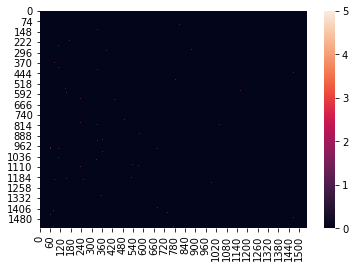

In [98]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred))
print("accuracy score %s%%" % (accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test, y_pred))


#### 4.3.2 Sample Perdiction

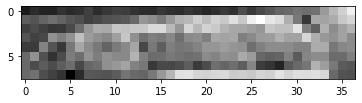

array(['eye'], dtype=object)

In [116]:
pre_sample = prepared_data.sample(1)
perdiction = KNNmodel.predict(scaler.transform(pre_sample.drop(columns=['names','image_id','image_pixels','total_pixels'])))
plt.imshow(pre_sample['image_pixels'].values[0],cmap='gray')
plt.show()
perdiction

### 4.2 Comparing Algorithms 
---

In [ ]:
# Comparing Algorithms 
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Algorithms
models = []
models.append(( 'Naive Bayes' , GaussianNB()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree' , DecisionTreeClassifier()))
models.append(( 'RandomForestClassifier' , RandomForestClassifier()))
models.append(( 'MLPClassifier' , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=347288723)))

# Test options and evaluation metric
seed = 347288723 
print('Images Dataset:\n')
results = []
names = []
for name, model in models:
  models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, np.ravel(y_train), cv=models_kfold)
  cv_results_testing = cross_val_score(model, X_test, np.ravel(y_test), cv=models_kfold)
  results.append(cv_results)
  names.append(name)
  msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
  print(msg)
  msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
  print(msg_testing)
print('10-Fold cross-validation accuracy score applied for the training data for 5 classifiers')

## **5. Improve Result by playing with hyperparameters and innovative methods like ensembles.**
---


#### 3.4.2 Feature Importance

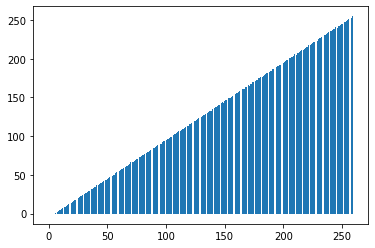

In [73]:
from sklearn.feature_selection import VarianceThreshold
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = pd.DataFrame(sel.fit_transform(prepared_data.drop(columns=['names','image_id','image_pixels','total_pixels'])))
y = prepared_data['total_pixels']
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **6. Choose the best model and present the results.**
---

## **Conclusion**